# Kolis Nr.2 2021-10-25

Sprendimus siųskite (vardas_pavarde_k2.ipynb; ipynb ir pdf/html formatais)
iki 2022-11-06 23:55 į avoicikas@gmail.com

Įveskite savo vardą ir pavardę

Visos užduotys turi būti atliktos naudojant tik šias pakuotes

In [1]:
import os
import shutil
import re
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

idx = pd.IndexSlice

In [1]:
!git pull


Updating 68e9275..509b12a
Fast-forward
 data/.keep                              |      0
 data/EEGcz.csv                          |   1126 +
 data/EO_EC/EC_01.csv                    | 647924 +++++++++++++++++++++++++++
 data/EO_EC/EC_02.csv                    | 639945 +++++++++++++++++++++++++++
 data/EO_EC/EC_03.csv                    | 635440 +++++++++++++++++++++++++++
 data/EO_EC/EC_04.csv                    | 633900 +++++++++++++++++++++++++++
 data/EO_EC/EC_05.csv                    | 637979 +++++++++++++++++++++++++++
 data/EO_EC/EC_06.csv                    | 647138 +++++++++++++++++++++++++++
 data/EO_EC/EC_07.csv                    | 648202 +++++++++++++++++++++++++++
 data/EO_EC/EC_08.csv                    | 638684 +++++++++++++++++++++++++++
 data/EO_EC/EC_09.csv                    | 639797 +++++++++++++++++++++++++++
 data/EO_EC/EC_10.csv                    | 643599 +++++++++++++++++++++++++++
 data/EO_EC/EO_01.csv                    | 672893 +++++++++++++++++++++++++++++

From https://gitlab.com/Voicikas/biod2022
   68e9275..509b12a  main       -> origin/main
Updating files:  20% (10/49)
Updating files:  22% (11/49)
Updating files:  24% (12/49)
Updating files:  26% (13/49)
Updating files:  28% (14/49)
Updating files:  30% (15/49)
Updating files:  32% (16/49)
Updating files:  34% (17/49)
Updating files:  36% (18/49)
Updating files:  38% (19/49)
Updating files:  40% (20/49)
Updating files:  42% (21/49)
Updating files:  44% (22/49)
Updating files:  46% (23/49)
Updating files:  48% (24/49)
Updating files:  51% (25/49)
Updating files:  53% (26/49)
Updating files:  55% (27/49)
Updating files:  57% (28/49)
Updating files:  59% (29/49)
Updating files:  61% (30/49)
Updating files:  63% (31/49)
Updating files:  65% (32/49)
Updating files:  67% (33/49)
Updating files:  69% (34/49)
Updating files:  71% (35/49)
Updating files:  73% (36/49)
Updating files:  75% (37/49)
Updating files:  77% (38/49)
Updating files:  79% (39/49)
Updating files:  81% (40/49)
Updating fil

Vertinimas

- Komentarai (veiksmų planas ir paaiškinimas) 25 %
- Programos kodas 25 %
- Rezultatas 25 %
- Grafikai 25 %


---
>> **1. UŽDUOTIS**
>>
>> Parašykite kodą kuris sugeneruotų šiuos grafikus.
>>
>> a)
>>
>> ![waveA](waveA.png)
>>
>> b)
>>
>> ![waveB](waveB.png)
>>
---

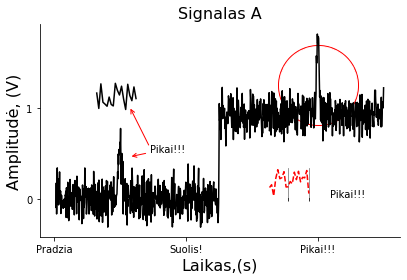

In [52]:
#1. paprastas figuros ir grafiko sukonstravimas
ax=plt.gca()
#Fontu dydziu tvarkymas
ax.set_xlabel("Laikas,(s)",fontsize=16)
ax.set_ylabel("Amplitudė, (V)",fontsize=16)
ax.set_title("Signalas A",fontsize=16)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
#Axis X tvarkymas
ax.set_xticks([0,400,800])
ax.set_xticklabels(['Pradzia','Suolis!','Pikai!!!'])
#AXis Y tvarkymas
ax.set_yticks([0,8,16])
ax.set_yticklabels(['0','1','2'])
#Apskritimas raudonas
plt.plot(800, 10, 'o', markersize=80,c="r")
plt.plot(800, 10, 'o', markersize=78,c="white")
#Cia zemiau komentarai apie naudojima plt.Circle, bet kadangi pas mane asys ne vienodos - pats paprasciausias budas tikrai sitas.
#Problema su apskritimu kad figuros dimensijos nera lygios todel ji toks labiau ovalus bokstas iseina.
#ax.set_aspect('equal') - taip galima sulygint x ir y figuros ir apskritimas gautusi puikus bet tada sugenda visi kiti dimensijom
#paremti grafiko objektai. Todel negalejau panaudoti jo.
#2. Sujungta spiku funkcija su triuksmo funkcija ir pamodifikuota kad atitiktu reikiama vaizdini.
#2.1 Treciu spaiku sukurtas pakelimas(suolis) tikrai ne tobulas ir turetu but budas kaip tai paprasciau padaryti.
s1 = 8
s2 = 5
s3=500
sample_rate=1000
noise=np.random.randn(sample_rate)
t = np.linspace(5, len(noise), sample_rate)
spike = [ sample_rate * 0.2, sample_rate * 0.8,sample_rate ]
spike_train = np.random.normal(
    + np.exp(-(((t - spike[0]) / (s1)) ** 2)+1.5)  # width of the Gaussian
    + np.exp(-(((t - spike[1]) / (s2)) ** 2)+2)
    + np.exp(-(((t - spike[2]) / (s3)) ** 1000)+2)
    )
#####
#Piku zymejimai su annotate - ismokta B dalyje daryti.
rod=plt.annotate("Pikai!!!",xy=(346.5,20),xycoords='axes points',xytext=(290,40))
rod1=plt.annotate("Pikai!!!",xy=(90,80),xycoords='axes points',xytext=(110,85),arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color="red"))
rod2=plt.annotate("",xy=(90,130),xycoords='axes points',xytext=(110,90),arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color="red"))

#Pats grafikas pavaizduotas - 
plt.plot(t,spike_train,c="black")
#Main grafikas baigtas
#Subplotai
sample_rate=20
noise=np.random.randn(sample_rate)
t = np.linspace(1, len(noise), sample_rate)
ax2 = plt.axes([0.25, 0.6, 0.1, 0.1])
spike_train1 = np.random.normal(
    + np.exp(-(((t - spike[0]) / (s1)) ** 2)+2))
plt.plot(t,spike_train1,c="black")
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.box(False)
ax3 = plt.axes([0.65, 0.3, 0.1, 0.1])
spike_train2 = np.random.normal(
    + np.exp(-(((t - spike[0]) / (s1)) ** 2)+2))
plt.plot(t,spike_train2,c="r",linestyle="--")
plt.grid(visible=True, which='major', axis='x',color='gray')
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax3.set_yticks([])
plt.box(False)
plt.show()
#Cia apacioje sukuriau du subplotus kur is esmes pakartojau visus pries tai darytus zingsnius ir patrumpinau sample rato ilgi,
#bei pora spalvu ar liniju formu pakeista pagal pavyzdi
#Paskutine problema yra tik tai kad subplotuose pavaizduoti ne peakai o naujai sugeneruojami signalai kuriuose peakas yra - 
#Be ne pati peaku dalis is main signalo


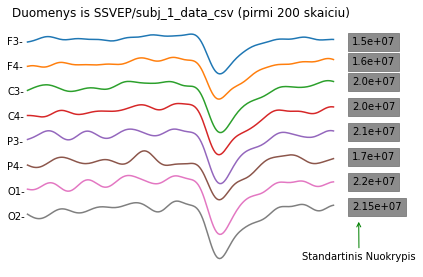

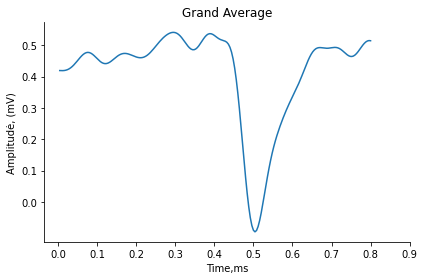

In [41]:
#BBB1
#1. Duomenu importavimas ir figuros sukurimas
duom = pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K2\SSVEP\subj_1_data.csv")
fig=plt.figure()
#1.1 Pasirinkimas pirmu 200 skaiciu is duomenu.
new=duom.iloc[1:201,1:10]
#1.2Standartines deviacijos kolonos sukurimas velesniam panaudojimui
std=new.std()
#2. Atskiru matavimu vietu atskyrimas, plotinimas ir padalinimas del paprastesniu tolimesniu veiksmu
#2.1 Prie kiekvieno ploto duomenu pridedu skirtinga skaiciu kad butu erdviskai atskirti grafike.
F3=new["F3"]/1e5+2800
F3.plot()
F4=new["F4"]/1e5+2400
F4.plot()
C3=new["C3"]/1e5+2000
C3.plot()
C4=new["C4"]/1e5+1600
C4.plot()
P3=new["P3"]/1e5+1200
P3.plot()
P4=new["P4"]/1e5+800
P4.plot()
O1=new["O1"]/1e5+400
O1.plot()
O2=new["O2"]/1e5
O2.plot()
#3.Grafiko tvarkymas
ax = plt.gca()
#3.1 Panaikinamos x ir y asys
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#3.2 Pavadinimas
ax.set_title("Duomenys is SSVEP/subj_1_data_csv (pirmi 200 skaiciu)")
#3.3 Prie kiekvienos kolonos pridedamas zymuo su annotacija
#Taip pat tikrai netobulas metodas, per daug mechaninio darbo ir tikrai turetu but galima be annotationu tai padaryt
plt.annotate("O2-",xy=(-5,50),xycoords='axes points')
plt.annotate("O1-",xy=(-5,75),xycoords='axes points')
plt.annotate("P4-",xy=(-5,100),xycoords='axes points')
plt.annotate("P3-",xy=(-5,125),xycoords='axes points')
plt.annotate("C4-",xy=(-5,150),xycoords='axes points')
plt.annotate("C3-",xy=(-5,175),xycoords='axes points')
plt.annotate("F4-",xy=(-5,200),xycoords='axes points')
plt.annotate("F3-",xy=(-5,225),xycoords='axes points')
#3.4 Nusprendziau kad lengviausia standartine deviacija ideti cia i stringa cia tesiog ranka nukopijavus is print(std)
#Galima butu su std[x+1] for ciklu padaryt automatiskai bet cia kai tik astuoni atrode nereikalinga
#print(std)
t1=plt.annotate("2.15e+07",xy=(340,60),xycoords='axes points')
t2=plt.annotate("2.2e+07",xy=(340,85),xycoords='axes points')
t3=plt.annotate("1.7e+07",xy=(340,110),xycoords='axes points')
t4=plt.annotate("2.1e+07",xy=(340,135),xycoords='axes points')
t5=plt.annotate("2.0e+07",xy=(340,160),xycoords='axes points')
t6=plt.annotate("2.0e+07",xy=(340,185),xycoords='axes points')
t7=plt.annotate("1.6e+07",xy=(340,205),xycoords='axes points')
t8=plt.annotate("1.5e+07",xy=(340,225),xycoords='axes points')
#3.5 Standartinio nuokrypio rodykles sukonstravimas
rod=plt.annotate("Standartinis Nuokrypis",xy=(346.5,50),xycoords='axes points',xytext=(290,10),arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color="green"))
#3.6 konstruojamas pilkas bbox fonas standartiniai paklaidai
t1.set_bbox(dict(facecolor='grey', alpha=0.9, edgecolor='grey'))
t2.set_bbox(dict(facecolor='grey', alpha=0.9, edgecolor='grey'))
t3.set_bbox(dict(facecolor='grey', alpha=0.9, edgecolor='grey'))
t4.set_bbox(dict(facecolor='grey', alpha=0.9, edgecolor='grey'))
t5.set_bbox(dict(facecolor='grey', alpha=0.9, edgecolor='grey'))
t6.set_bbox(dict(facecolor='grey', alpha=0.9, edgecolor='grey'))
t7.set_bbox(dict(facecolor='grey', alpha=0.9, edgecolor='grey'))
t8.set_bbox(dict(facecolor='grey', alpha=0.9, edgecolor='grey'))
annotation_clip=False
plt.tight_layout()
plt.box(False)
plt.show()
#B2
#Paprastai sudedama visu kolonu verte ir gaunamas vidurkis 
vidurkis=F3+F4+C3+C4+P3+P4+O1+O2
vidurkis.plot()
ax=plt.gca()
#Struktura grafiku
ax.set_xlabel("Time,ms")
ax.set_ylabel("Amplitudė, (mV)")
ax.set_xticks([   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.],[ 0.0,  0.1,  0.2,  0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9])
ax.set_yticks([  7000.,  8000.,  9000.,  10000., 11000.,12000],[   0.0,  0.1,  0.2,  0.3, 0.4, 0.5])
ax.set_title("Grand Average")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.show()
#Siek tiek siauresni grafikai bet man neatrodo kad tai problema


---
>> **2. UŽDUOTIS**
>>
>> biodiversity.xlsx faile pateikti rūšių įvairovės matavimai skirtingose vietose.
>> Pirmoje eilutėje užkoduotas vietovės pavadinimas (Miškasx kur x mėginio numeris), antroje tiriamo objekto ploto matavimas metrais ir koordinatės taškų
>>
>> Toliau pateiktas sąrašas aptiktų augalų skirtingose miško arduose (Mx miško, K- krūmų, Z-žolė, S-samanos) skirtingose vietose įvertinant procentinį padengimą. Nesant augalui paliktas tuščias laukelis.
>>
>> - Importuokite lentelę ir išskaidykite į dvi lenteles biodiversijos matavimams ir koordinatėms. Sutvarkykite lentelę, užpildykite trūkstamas vertes etc.
>> - Išskaidykite skirtingo ardo matavimus į atskiras lenteles
>> - Suskaičiuokite kiekvienos vietovės rūšių gausumo indeksą (kiek yra skirtingų rūšių [yra/nėra])
>> - Vizualizuokite skirtingo ardo gausumo priklausomybę nuo vietovės (miško).
>> - Vizualizuokite klono ploto priklausomybę nuo rūšių skaičiaus skaičiuojant visuose arduose kartu (rūšys kartojasi).
>> - Raskite vidutinį atstumą tarp matavimų.
>>
---

In [42]:
#Ikelimas ir valymas
data = pd.read_excel(r"C:\Users\taura\Documents\biod2022\exam\K2\biodiversity.xlsx",sheet_name="Sheet4")
#Ilgas procesas gauti elementus kad uzdeti pavadinimus teisingai
skaid=data.loc[idx[1]]
mano=skaid.head(1).index #Izoliuoti pavadinimai kolonu pagaliau
pd.Series(mano) #Pavertimas i Series nes negalima veiksmu atlikti kitaip
nau=mano.str.split( n=-1, expand=True)#Pirmos vertes isskaidymas, delimiteris automatiskai yra whitespace
nau=pd.Series(nau[0])
a=pd.Series([0])
nau=pd.concat([a, nau], ignore_index=True)# vietoj redagavimo visu duomenu atrode zymiai paprasciau prailginti names su vienu elementu kad sutaptu dydziai
data.columns=nau#Del vienodu dydziu galima ramiai pakeisti vardus
#Duomenu aptvarkymas paskutinis - Na vertes pasalinimos.
data=data.set_index(keys=data[0])
data = data.drop(data.columns[[0]], axis=1) 
data=data.fillna(0)
data=data.loc[data.index.dropna()]
#Iskaidymas i atskiras lenteles ir issimu paskutini row elementa del tvarkos nes jis yra iki kurio tasko ejom
pirma=data.loc[idx['M1':'M2']]
pirma = pirma[~pirma.index.duplicated(keep='first')]      
pirma.drop(pirma.tail(1).index,inplace=True)
pirma.drop(pirma.head(1).index,inplace=True)
antra=data.loc[idx['M2':'K']]
antra=antra[~antra.index.duplicated(keep='first')]
antra.drop(antra.tail(1).index,inplace=True)
antra.drop(antra.head(1).index,inplace=True)
trec=data.loc[idx['K':'Z']]
trec = trec[~trec.index.duplicated(keep='first')]
trec.drop(trec.tail(1).index,inplace=True)
trec.drop(trec.head(1).index,inplace=True)
ketv=data.loc[idx['Z':'S']]
ketv = ketv[~ketv.index.duplicated(keep='first')]
ketv.drop(ketv.tail(1).index,inplace=True)
ketv.drop(ketv.head(1).index,inplace=True)
#Pagaliau iki cia viskas veikia
#Gausumo indexo skaiciavimai
newdata=data
vardcol=newdata.columns.values.tolist()
newdata= newdata.drop_duplicates(subset=vardcol) 
#Kadangi skaiciuojame tik Gausuma zonoje -
# Ismetame visus pasikartojancius elementus kad galetume naudoti bednra ilgi kaip vieneta su kuo lyginti
newdata=newdata[4:]  
count = (newdata[vardcol] != 0).sum() #Suskaiciuojame visose kolonose esancius ne nulius
forma=newdata.shape[0]
gausumoIndexas=count/forma
#GAUSUMO INDEXAS BAIGTAS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1

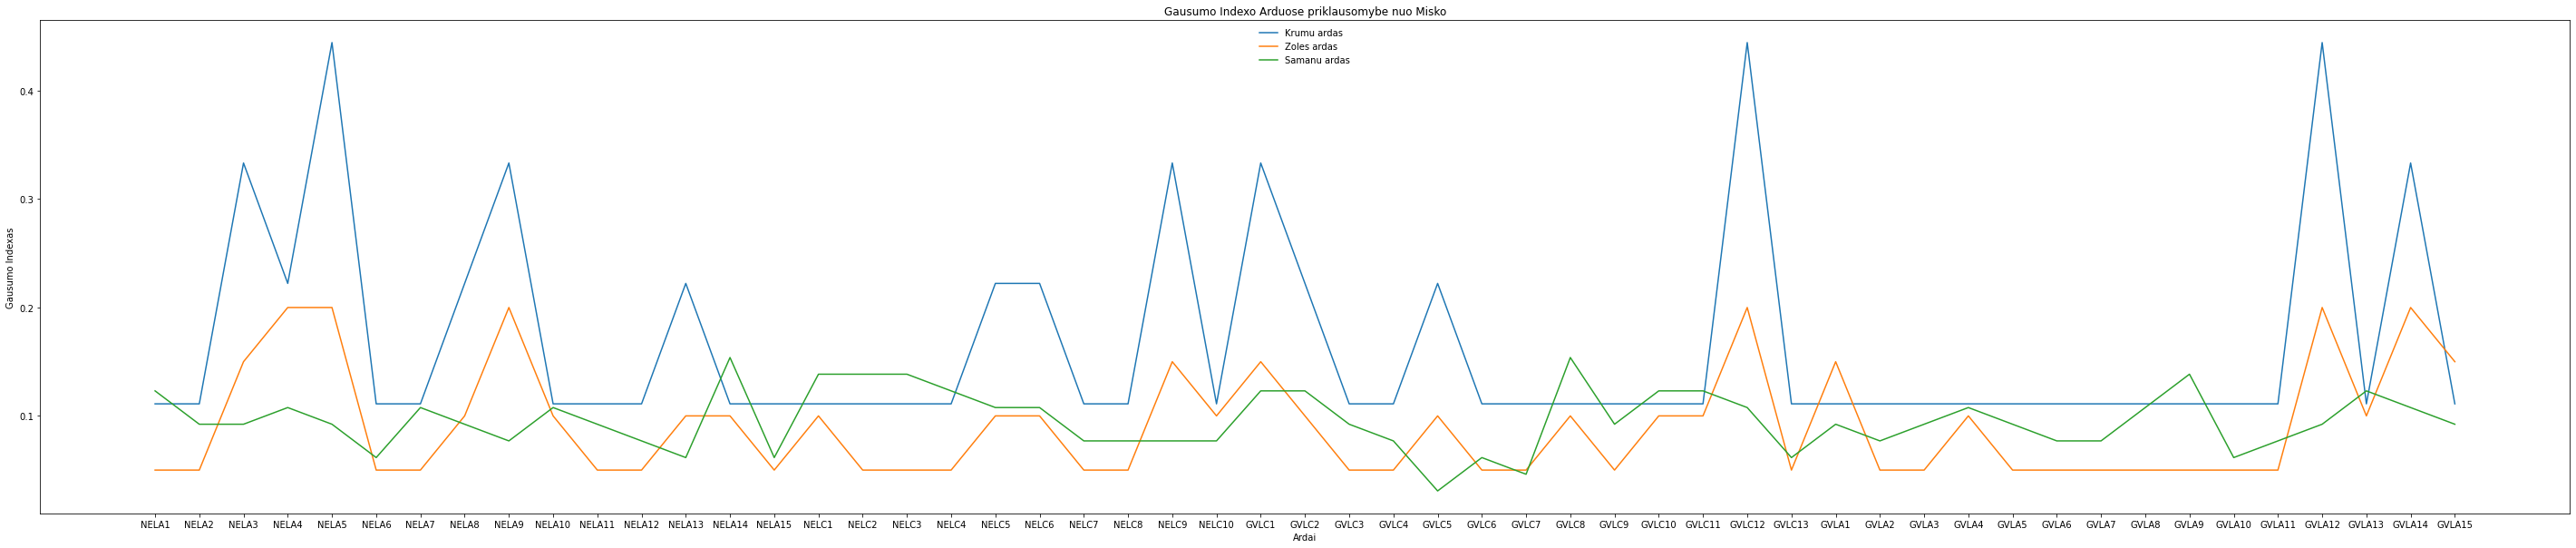

In [43]:
#Pirmas
count1 = (pirma[vardcol] != 0).sum()
forma1=pirma.shape[0]
gausumoIndexas1=count1/forma1
#Antras
count2 = (antra[vardcol] != 0).sum()
forma2=antra.shape[0]
gausumoIndexas2=count2/forma2
#Trecias
count3 = (trec[vardcol] != 0).sum()
forma3=trec.shape[0]
gausumoIndexas3=count3/forma3
#Ketvirtas ardas
count4 = (ketv[vardcol] != 0).sum()
forma4=ketv.shape[0]
gausumoIndexas4=count4/forma4
# Suklijuojame viska i keturias kalones su pavadinimasi MISKAS , KRUMAI, ZOLE, SAMANOS
DATAF= pd.DataFrame([gausumoIndexas1, gausumoIndexas2, gausumoIndexas3,gausumoIndexas4])
ardupav=pd.Series(["M","K","Z","S"])
DATAF=DATAF.set_index(ardupav)
#########################
#I grafika nedejau "M" Ardo nes jo visos vertes 1.0 ir neatrodo tikslinga tiesia linija vaizduoti nes joje nera jokios priklausomybes nuo Misko
fig = plt.figure(figsize=(50,10))
ax=plt.axes()
#Parametras keisti font dydi jeigu norisi
plt.rcParams.update({'font.size': 10})
ardK=DATAF.loc["K"]
ardZ=DATAF.loc["Z"]
ardS=DATAF.loc["S"]
pavaa=list(DATAF.columns)
ardK.plot(label="Krumu ardas")
ardZ.plot(label="Zoles ardas")
ardS.plot(label="Samanu ardas")
ax.set_title("Gausumo Indexo Arduose priklausomybe nuo Misko")
ax.set_xlabel("Ardai")
ax.set_ylabel("Gausumo Indexas")
ax.legend(loc='upper center',frameon=False)#Nuemiau legendos remeli su frameon funkcija
x = np.arange(len(pavaa))
ax.set_xticks(x)
ax.set_xticklabels(pavaa, minor=False)
plt.show()
# nekomentuosiu vaizdavimo nes jis beveik visur pasikartoja.

<AxesSubplot:xlabel='rusys'>

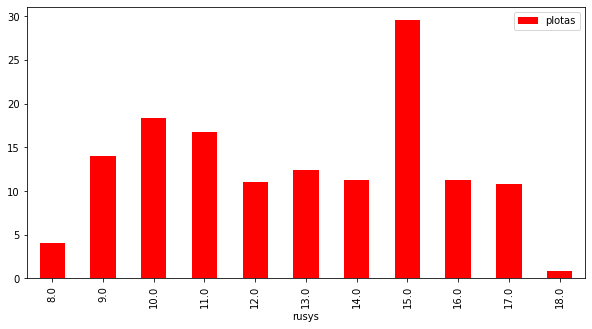

In [44]:
#Vizualizuokite klono ploto priklausomybę nuo rūšių skaičiaus skaičiuojant visuose arduose kartu (rūšys kartojasi)
klon=data.loc["klono dydis"]
klon=klon.str.split(pat="x" ,n=-1,expand=True)#Vel isskaidome per x i ploti ir ilgi kad galetume skaiciuoti plota
blogas=klon.isin(['.1.5'])#RANDAME BLOGA DUOMENI NES DEL TO BLOGO .1.5 NEGALIME DUOMENU PAVERSTI I FLOATA IR ATLIKT SKAICIAVIMUS. ATLIKE SITA MATOME KUR JIS 
blogoloc=blogas.loc[blogas[1] == True].index
#PATAISYMAS TO DUOMENS
vieta=klon.loc[blogoloc[0]]
klon=klon.replace(['.1.5'], '1.5')
#PAVERTIMAS DATAFRAME I FLOATA KAD BUTU GALIMA LENGVAI DAUGINTI IR GAUTI PLOTA
klon=klon.astype(float) 
klonilgis=klon[0]
klonplotis=klon[1]
klonplotas=klonilgis*klonplotis
#GAVOME PLOTA 
#Suklijuodami Ploto ir rusio kiekio duomenys galime paprastai pavaizduoti ploto priklausomybe nuo rusiu kiekio
bigcount = (newdata[vardcol] != 0).sum()
deze= pd.concat([klonplotas, bigcount], axis=1)
deze.columns=["plotas","rusys"]
deze=deze.T#patogiau apvertus
deze=deze.sort_values(by="rusys",axis=1,ascending=True)#Surusiuotas pagal didejimas vertes rusiu kiekio
deze=deze.T# Apverciam atgal
deze.reset_index( drop=True, inplace=True)
deze=deze.groupby(["rusys"]).mean()#Sutraukiam atskirus vienodo rusiu kiekio plotus ir gauname ju vidurki.
deze.plot(kind="bar",figsize=(10,5),color="r",)# Grafikas, Butu galima ji labiau papuosti

In [45]:
#Raskite vidutinį atstumą tarp matavimų.
# create pandas series
xas=data.loc["koord x"]
yas=data.loc["y"]
xas=xas.sort_values(ascending=True)
xas=xas.drop(index=["GVLA2"])
xsmall=xas.loc["GVLC7"]
yas=yas.sort_values(ascending=True)
yas=yas.drop(index=["GVLA2"])
ysmall=yas.loc["GVLA6"]
#SURADOM MAZIAUSIUS VIENETUS IR SUTVARKEM ABU SARASUS
xas=(xas-xsmall)**2
yas=(yas-ysmall)**2
atstumas=xas+yas
atstumosak=atstumas**(1/2)
#Gavome kiekvieno elemento atstuma
VidutinisAtstumas=atstumosak.mean().round(3)
#BAIGTA
print("Vidutinis atstumas tarp kiekvieno matavimo yra "+str(VidutinisAtstumas))
#PROBLEMA
#Reiktu padaryti si procesa kiekvienai x vertei su kiekviena x verte o ne su maziausiu x su visom kitom. 
#Tai butu galima padaryti su for ciklu, bet is tiesu nespejau tesiog.


Vidutinis atstumas tarp kiekvieno matavimo yra 0.084


---
>> **3. UŽDUOTIS**
>>
>> Sukeltinių potencialų (ERP) vizualizavimas.
>>
>> K2/SSVEP direktorijoje pateikti EEG eksperimento duomenys.
>> Eksperimento metu tiriamiesiems buvo pateikta keturių dažnių [SSVEP](https://en.wikipedia.org/wiki/Steady_state_visually_evoked_potential) stimuliacija (panašiai kaip pateiktame video).
>>
>> Viso eksperimento metu fiksuota 8 kanalų EEG.
>>
>> ![8 kanalų EEG](chan8.png)
>>
>> Eksperimento etapai:
>> - Tiriamasis instruktuojamas fokusuotis į vieną iš stimulų
>> - Stimulai pradeda mirksėti ir tuo pat metu duomenys pažymimi instruktuotu žymeniu. Stimulas trunka 10 sekundžių.
>> - Pertraukėlė ir viskas kartojasi. Pertrauka apie 6 sekundes.
>>
>> Duomenų failai:
>> - EEG duomenys: SSVEP/tiriamojo_numeris_data.csv (Laikas milisekundėmis ir matavimas kiekviename kanale milivoltais, 250 Hz diskretizacijos dažnis)
>> - Stimuliacijos žymenys: SSVEP/tiriamojo_numeris_annotations.csv (laikas duomenyse ir žymens tipas)
>>
>> **Suskaičiuoti/suprogramuoti/nupaišyti:**
>> - Automatinį duomenų radimą, importavimą, sutvarkymą.
>> - Skirtingų įvykių suskirstymas ir EEG duomenų suvidurkinimas gaunant atitinkamus ERP.
>> - Nubraižyti:
>>   - Kiekvieno žmogaus individualius sukeltinius potencialus kiekvienam stimuliacijos dažniui <subj x 4 stimuliacijos dažniai> visuose kanaluose (viename grafike visi kanalai)
>>   - Vidutinį atsaką į kiekvieną stimuliacijos dažnį visuose dalyviuose (4 grafikai kuriuose po 8 kanalus).
>>  - Vidutinį atsaką į kiekvieną stimulo tipą (4 grafikai po 1 kanalą)
>>  - Vidutinį atsaką į šviesos stimulą (1 grafikas)
>>
>> [Plačiau apie SSVEP](SSVEP.pdf)
---

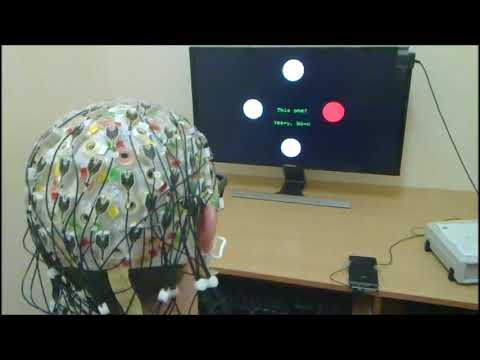

In [46]:
from IPython.display import YouTubeVideo
video = YouTubeVideo(id='t96rl1SFHlI', width=400, height=200, fs=1, autoplay=0)
video

In [47]:

# This is to get the directory that the program
# is currently running in.
result = []
def find_files(filename, search_path):
    for root, dir, files in os.walk(search_path):
        if filename in files:
        result.append(os.path.join(root, filename))
    return result

IndentationError: expected an indented block (4077417932.py, line 7)

---
>> **4. UŽDUOTIS**
>>
>>
>> ![Result](./Vertinimas/Emotions.png)
>>
>> duomenys direktorijoje Vertinimas/.
>>
>> Muzikantai grojo kūrinius ir stengėsi perteikti emociją. Grota emocija užkoduota list..csv failuose. Pvz:
>> aud/009_2_4_Distressed.ogg -> 'Distressed' - susikrimtęs - bandyta perteikti emocija.
>>
>> Vėliau žmonės klausėsi grojimo ir bandė nuspėti kokią emociją bandė perteikti atlikėjai. Duomenys pateikti Emotional_evaluation... failuose.
>>
>> - list..csv failuose pateiktas eiliškumas garsų atsispindi Emotional_evaluation.csv failuose esančiame numeracijoje.
>> - Pirmo garso valentingumas ir sužadinamumas įvertintas ties klausimu
(1.1 Please indicate valence and arousal ratings), Valence ir Arousal stulpeliuose. Spėjama emocija viename iš stulpelių ties (1.2 Please indicate which emotion the piece was aiming to transfer)
>> - Kiekvienas Emotion... failas turi savo atitikmenį list... pvz: Emotional_evaluation_01.xlsx pagalbinis failas list_01.csv
>>
>> **Užduotys**:
>> - Sujunkite visus duomenų failus į vieną lentelę.
>> - Kiek žmonių atliko vertinimą? Iš kokių valstybių ir miestų dalyviai? Vidutinė vertinimo trukmė? Vyrų ir moterų santykis? Vidutinis amžius? Koks vertinusių žmonių muzikinis išsilavinimas?
>> - Atkartokite grafiką naudojant pateiktus duomenis. Ar pavyko muzikantams perteikti emociją?
>>   - Naudodami įvertinimus sklaidos grafike ir nuspalvindami taškus norėta perteikti muzikantų emocija.
>>
>> Pavyzdinis grafikas su kitais duomenimis
>>
>> ![Result](./Vertinimas/result.png)
>>

---

In [48]:
#Duomenu skaitymas
#DUOMENYS SUJUNGTI I VIENA LENTELE IR NA PASALINTI
data1 = pd.read_excel(r"C:\Users\taura\Documents\biod2022\exam\K2\Vertinimas\Emotional_evaluation_01.xlsx")
data2 = pd.read_excel(r"C:\Users\taura\Documents\biod2022\exam\K2\Vertinimas\Emotional_evaluation_02.xlsx")
data3 = pd.read_excel(r"C:\Users\taura\Documents\biod2022\exam\K2\Vertinimas\Emotional_evaluation_03.xlsx")
DATA=pd.concat([data1,data2,data3])
DATA=DATA.fillna(0)
#ATSAKINEJIMAS I KLAUSIMUS
dalskai=(DATA["Time"] != 0).sum()
print("Kiek žmonių atliko vertinimą? " +str(dalskai)+" Zmoniu") #Kiek zmoniu dalyvavo.

saluni=DATA["Country"].unique()
print("Iš kokių valstybių dalyviai?  "+str(saluni[1:]))#Paprasciau taip negu pasalinti nuli is kiekvieno.

cituni=DATA["City"].unique()
print("Iš kokių miestų dalyviai?  "+str(cituni[1:]))#Is kokiu miestu dalyviai.

vidtrukm=((DATA["Duration (s)"]).sum()/11).round(2)
print("Vidutinė vertinimo trukmė? "+ str(vidtrukm)+" s")#Vidutine trukme vertinimo

lytmot=(DATA["Please indicate your gender:"] != 0).sum()
lytvyr=(DATA["Please indicate your gender:.1"] != 0).sum()
lytsan=(lytvyr/lytmot).round(2)
print("Vyrų ir moterų santykis? "+str(lytsan))  #Gautas vyru ir moteru santykis.

vidamz=((DATA["Please indicate your age:"]).sum()/11).round()
print("Vidutinis amžius? "+str(vidamz)) # Vidutinis amzius.

 #Koks vertinusių žmonių muzikinis išsilavinimas?
issilav1=np.count_nonzero(DATA["How many years of musical training (if any) do you have?"])
issilav15=(DATA["How many years of musical training (if any) do you have?.1"] == 1).sum()
print("Koks vertinusių žmonių muzikinis išsilavinimas: Vienerius metus muzikinio išsilavinimo turi "+str(issilav1)+". 1-5 metus muzikinio išsilavinimo turi "+str(issilav15)+" Tiriamieji.")
#BAIGTI KLAUSIMAI

Kiek žmonių atliko vertinimą? 11 Zmoniu
Iš kokių valstybių dalyviai?  ['Lithuania' 'Latvia' 'Belgium']
Iš kokių miestų dalyviai?  ['Vilnius' 'Palanga' 'Riga' 'Širvintos' 'Melsele']
Vidutinė vertinimo trukmė? 1663.82 s
Vyrų ir moterų santykis? 0.89
Vidutinis amžius? 31.0
Koks vertinusių žmonių muzikinis išsilavinimas: Vienerius metus muzikinio išsilavinimo turi 2. 1-5 metus muzikinio išsilavinimo turi 2 Tiriamieji.


In [49]:
#GRAFIKO KURIMAs
DATA=DATA.drop([0]) #NEPAMIRSTI NUIMTI HASTAGA
DATA=DATA.reset_index() #NEPAMIRSTI NUIMTI HASTAGA
emocija=DATA.filter(regex="Please indicate which emotion the piece was aiming to transfer:")#250 Kolonu
valenc=DATA.filter(regex="Please indicate valence and arousal ratings")  #100  kolonu
val=valenc.iloc[:, ::2].T.reset_index(drop=True)  #100  kolonu
aro=valenc.iloc[:, 1::2].T.reset_index(drop=True)  
#ATSKYRIMAS EMOCIJU Pirma dariau su filtravimu zymiai sudetingiau, bet is gautu duomenu pastebejau kad skiriasi 
#kiekvienos nuotaikos kolonos vardo galo zymejimas ir galima zymiai paprasciau taip atskirti.
relax=DATA.filter(regex=' Please indicate which emotion the piece was aiming to transfer:.3')#Atfiltravimas teisingu emociju
relax=relax.mask(relax==1,"r") #pakeiciau 1 i simboli atitinkanti norima emocija
relax.replace(0, np.nan, inplace=True)# Nulius paverciau i nan kad po to su combine funkcija butu galima visas emocijas lengvai suklijuoti i dataframa
# kurio parametrai butu identiski valentingumo ir arousal dataframam
relax=relax.T.reset_index(drop=True)
neutral=DATA.filter(regex=' Please indicate which emotion the piece was aiming to transfer:.2')
neutral=neutral.mask(neutral==1,"n")
neutral.replace(0, np.nan, inplace=True)
neutral=neutral.T.reset_index(drop=True)
distressed=DATA.filter(regex=' Please indicate which emotion the piece was aiming to transfer:.1')
distressed=distressed.mask(distressed==1,"d")
distressed.replace(0, np.nan, inplace=True)
distressed=distressed.T.reset_index(drop=True)
excited=DATA.filter(regex=' Please indicate which emotion the piece was aiming to transfer:.4')
excited=excited.mask(excited==1,"e")
excited.replace(0, np.nan, inplace=True)
excited=excited.T.reset_index(drop=True)
depressed=DATA.filter(regex=' Please indicate which emotion the piece was aiming to transfer:$')
depressed=depressed.mask(depressed==1,"dp")
depressed.replace(0, np.nan, inplace=True)
depressed=depressed.T.reset_index(drop=True)
#PADARYTAS IDENTISKAS KIEKVIENO TASKO ARRAY APIBUDINANTIS EMOCIJA
komb = relax.combine_first(neutral)
komb=komb.combine_first(distressed)
komb=komb.combine_first(excited)
komb=komb.combine_first(depressed)
#Suklijuota i dataframe apibudinti kiekvieno tasko emocija
#print(komb)

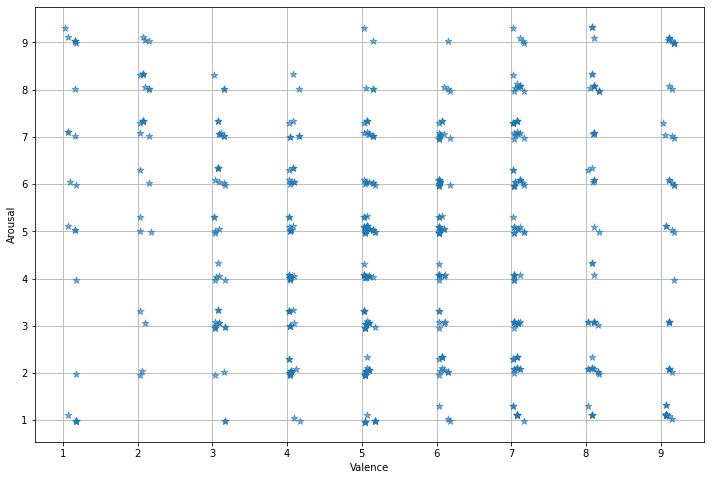

   0   1   2   3   4   5   6   7   8   9   10
0   n   n   n   r   r   r   n   d   d  dp   d
1   n   n   n   e   e   e   d   n   r   d   n
2   n   e   d   e   n   n   r   r   r   r   r
3   r   n   r   r   n   e   e  dp   n   r   d
4   n   n   n   n  dp   d  dp  dp   d  dp  dp
5   n   r   r   d  dp  dp   e   e   n   r   r
6   n   n   n   r   r  dp   r   r   d   d   e
7   n   r   r  dp   n  dp   e   n   e   e   e
8   n   e   r   e   e   e   d   n  dp   n   n
9   r   e   d   e   e   e   e   e   d   e   d
10  n   d   e   e   n   e   e   r   r   n  dp
11  r  dp  dp   r   r   r   r   n   d  dp   d
12  n   d   e   e   d   e   d   n   n   r   n
13  r   r   r   e   e   e   d   e   e   n   n
14  r   r   r   d   n   d   e   e   n   r   n
15  n   e   d   r   d   d   d   n   r  dp  dp
16  n   d   d   n   n   d   d   e   n   d   e
17  r  dp  dp   r   d   n   d   d  dp  dp   r
18  r  dp   n  dp  dp  dp  dp   d   e   e   e
19  r   e   e   d  dp  dp  dp   r   n   r   n
20  n   n   e   e   n   e   d   d 

In [50]:
#GRAFIKAS
#Susikuriu ašis, pavadinu kintamuosius
fig, ax= plt.subplots()
fig.set_size_inches(12,8)
x=val
y=aro
### ISMETYMAS- Noisas tesiog su random funkcija
a = 0.05
b = 0.2
c = 0.09
d = 0
n1 = a * np.random.randn(11) + c
n2 = b * np.random.randn(11) + d
#
#
plt.scatter(x+n1,y+n2,marker="*",s=50,alpha=0.6)
ax.set_yticks([1,2,3,4,5,6,7,8,9])
ax.set_xticks([1,2,3,4,5,6,7,8,9])
ax.set_xlabel("Valence", size=10)
ax.set_ylabel("Arousal", size=10)
ax.grid(visible=None, which='major')
ax.set_axisbelow(True);
plt.show()
print(komb)
# PADARIAU GERAI ISMETYTA GRAFIKA IR IDENTISKO DYDZIO Dataframa KURIAME TVARKINGAI SUDETOS NUOTAIKOS BET NIEKAIP NESUGEBU 
#PADARYTI KAD PRISKIRTU NUOTAIKA PRIE SPALVOS AR MARKERIU - Atsiprasau neislauziau niekaip.